In [22]:
!pip install plotly matplotlib seaborn --quiet

In [23]:
import numpy as np
import pandas as pd
import matplotlib
import statsmodels.api as sm
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()
%matplotlib inline

In [24]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [25]:
# load the preprocessed CSV data
rain_data = pd.read_csv('weatherAUS.csv')

In [26]:
rain_data

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[145460 rows x 23 columns]

In [27]:
list(rain_data.columns.values)

['Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

In [28]:
# check the data types
rain_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [29]:
rain_data .isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [33]:
# drop any missing value in 'RainToday', 'RainTomorrow' because they are important to make prediction and target.
# I will deal with the other missed values later
rain_data.dropna(subset = ['RainToday', 'RainTomorrow'], inplace = True )

In [34]:
rain_data .isnull().sum()

Date                 0
Location             0
MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustDir       9163
WindGustSpeed     9105
WindDir9am        9660
WindDir3pm        3670
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
RainToday            0
RainTomorrow         0
dtype: int64

In [35]:
rain_data.describe()

MinTemp       MaxTemp       Rainfall   Evaporation      Sunshine  \
count  140319.000000  140480.00000  140787.000000  81093.000000  73982.000000   
mean       12.184824      23.23512       2.349974      5.472516      7.630540   
std         6.403879       7.11450       8.465173      4.189132      3.781729   
min        -8.500000      -4.80000       0.000000      0.000000      0.000000   
25%         7.600000      17.90000       0.000000      2.600000      4.900000   
50%        12.000000      22.60000       0.000000      4.800000      8.500000   
75%        16.800000      28.30000       0.800000      7.400000     10.700000   
max        33.900000      48.10000     371.000000    145.000000     14.500000   

       WindGustSpeed   WindSpeed9am   WindSpeed3pm    Humidity9am  \
count  131682.000000  139732.000000  138256.000000  139270.000000   
mean       39.970520      13.990496      18.631141      68.826833   
std        13.578201       8.886210       8.798096      19.063650   
min         6.000000       0.000000       0.000000       0.000000   
25%        31.000000       7.000000      13.000000      57.000000   
50%        39.000000      13.000000      19.000000      70.000000   
75%        48.000000      19.000000      24.000000      83.000000   
max       135.000000     130.000000      87.000000     100.000000   

         Humidity3pm    Pressure9am    Pressure3pm      Cloud9am  \
count  137286.000000  127044.000000  127018.000000  88162.000000   
mean       51.449288    1017.654577    1015.257963      4.431161   
std        20.807310       7.104867       7.035411      2.886594   
min         0.000000     980.500000     977.100000      0.000000   
25%        37.000000    1013.000000    1010.400000      1.000000   
50%        52.000000    1017.600000    1015.200000      5.000000   
75%        66.000000    1022.400000    1020.000000      7.000000   
max       100.000000    1041.000000    1039.600000      9.000000   

           Cloud3pm        Temp9am        Temp3pm  
count  84693.000000  140131.000000  138163.000000  
mean       4.499250      16.987066      21.693183  
std        2.719752       6.496012       6.937784  
min        0.000000      -7.200000      -5.400000  
25%        2.000000      12.300000      16.600000  
50%        5.000000      16.700000      21.100000  
75%        7.000000      21.600000      26.400000  
max        9.000000      40.200000      46.700000

### Exploratory Data Analysis and Visualization

In [36]:
px.histogram(rain_data, x='Location', title='Location vs. Rainy Days', color='RainToday')

Location is important factor to predict rainy days and could be considered for correlations.

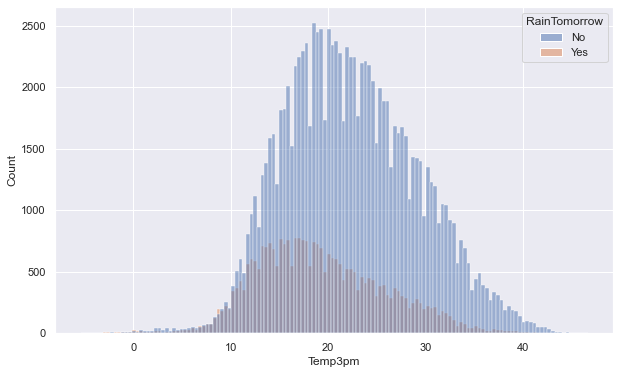

In [37]:
sns.histplot(x='Temp3pm', hue='RainTomorrow', data=rain_data);

At 3.00pm(s) when tempreture bellow 10 and over 35 degree centigrade, the probability of raining tomorrow is low.

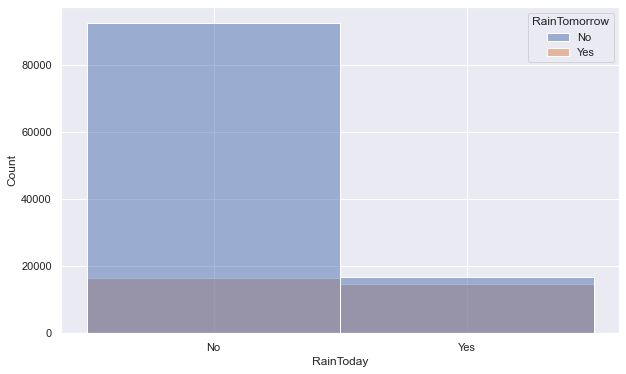

In [38]:
sns.histplot(x='RainToday', hue='RainTomorrow', data=rain_data);

If today is not rainy, the chance of rain tomorrow is low (about 10%) and if today rains, the probability of rain tommorrow is high. Predicting not rain (left bar) is easier than predicting the chance of rainy tomorrow (right bar). Many factors are involving to predict tomorrow is rainy or not.

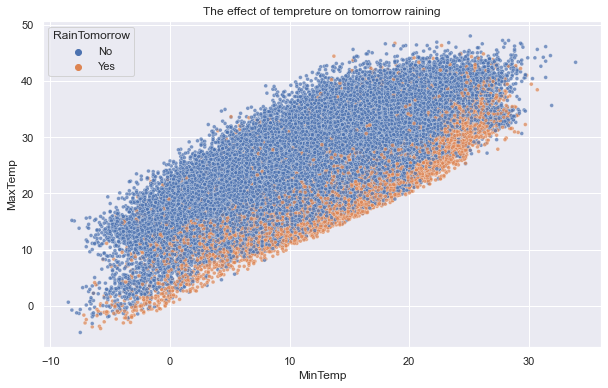

In [39]:
plt.title('The effect of tempreture on tomorrow raining')
sns.scatterplot(data=rain_data, x='MinTemp', y='MaxTemp', hue='RainTomorrow',alpha=0.7, s=15);

In [40]:
fig = px.scatter(rain_data.sample(3000), 
                 x='MinTemp', 
                 y='MaxTemp', 
                 color='RainTomorrow', 
                 opacity=0.3, 
                 hover_data=['RainToday'], 
                 title='The effect of tempreture on tomorrow raining')
fig.update_traces(marker_size=5)
fig.show()

Linear relationship between max and min temprature. Max and min temprature are very close and many times overlaped.

In [42]:
fig = px.scatter(rain_data.sample(6000), 
                 x='Temp9am', 
                 y='Humidity9am', 
                 color='RainTomorrow', 
                 opacity=0.3, 
                 hover_data=['RainToday'], 
                 title='effect of Temprature and humidity @ 9.00am on tomorrow raining')
fig.update_traces(marker_size=5)
fig.show()

Increasing the temprature cause to decrease humidity and decrease chance of raining tomorrow 

In [43]:
fig = px.scatter(rain_data.sample(8000), 
                 x='Sunshine', 
                 y='Evaporation', 
                 color='RainTomorrow', 
                 opacity=0.5, 
                 hover_data=['RainToday'], 
                 title='effect of sunshine and evaporation on tomorrow raining')
fig.update_traces(marker_size=5)
fig.show()

more sunshine prevent raining tomorrow and cause more evaporation.

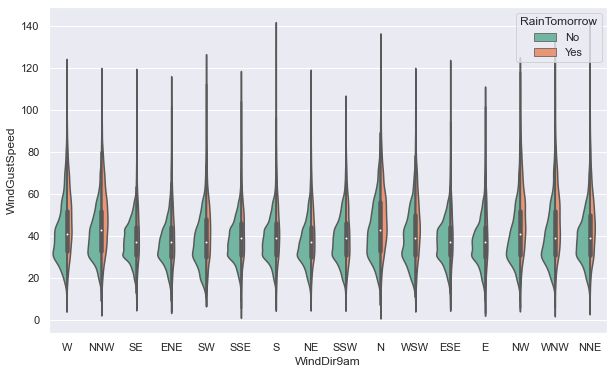

In [44]:
sns.violinplot(x='WindDir9am', y='WindGustSpeed', hue='RainTomorrow', split=True, palette='Set2',scale='count', data=rain_data);

Median of wind speed is about 40 km/h. It seems the wind speed between 20 to 70 km/h has the most effect on tomorrow raining. Also, Northerly winds make it more likely to rain tomorrow. The winds over 80 km/h are rare and outliers.

### Training, Validation and Test Sets
Choose random subsets of rows for creating test and validation sets

In [45]:
!pip install scikit-learn --upgrade --quiet

In [46]:
# use train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

In [47]:
#select 20% of rain_data and and adjust the size of the dataset random state of 42
train_val_df, test_df = train_test_split(rain_data, test_size=0.2, random_state=42)
# choose 25% of "train_val_df" and fix the size of the dataset on 42
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [48]:
print('rain_data.shape :', rain_data.shape)
print('train_val_df.shape :', train_val_df.shape)  # 20% of main dataset "rain_data"

print('train_df.shape :', train_df.shape)  # 75% of "train_val_df"
print('val_df.shape :', val_df.shape)      # 25% of "train_val_df"
print('test_df.shape :', test_df.shape)    # 25% of "train_val_df"

rain_data.shape : (140787, 23)
train_val_df.shape : (112629, 23)
train_df.shape : (84471, 23)
val_df.shape : (28158, 23)
test_df.shape : (28158, 23)


#### separate the training, validation and test sets with time (year)

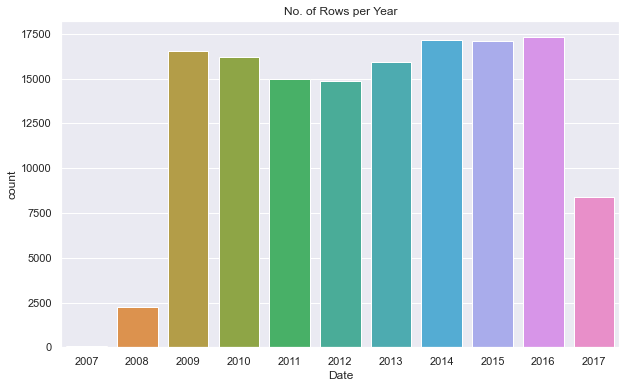

In [49]:
#seperate the sets by the year
plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(rain_data.Date).dt.year);

Use 2007 to 2014 for training set "train_df", 2015 for validation set "val_df" and the rest for test set "test_df"

In [50]:
year = pd.to_datetime(rain_data.Date).dt.year

train_df = rain_data[year < 2015]
val_df = rain_data[year == 2015]
test_df = rain_data[year > 2015]

In [51]:
print('rain_data.shape :', rain_data.shape)
print('train_val_df.shape :', train_val_df.shape)  # 20% of main dataset "rain_data"

print('train_df.shape :', train_df.shape)  # 2007 to 2015
print('val_df.shape :', val_df.shape)      # 2015
print('test_df.shape :', test_df.shape)    # 2016 and 2017

rain_data.shape : (140787, 23)
train_val_df.shape : (112629, 23)
train_df.shape : (97988, 23)
val_df.shape : (17089, 23)
test_df.shape : (25710, 23)


In [52]:
train_df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [53]:
val_df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
2133  2015-01-01   Albury     11.4     33.5       0.0          NaN       NaN   
2134  2015-01-02   Albury     15.5     39.6       0.0          NaN       NaN   
2135  2015-01-03   Albury     17.1     38.3       0.0          NaN       NaN   
2136  2015-01-04   Albury     26.0     33.1       0.0          NaN       NaN   
2137  2015-01-05   Albury     19.0     35.2       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
2133         WSW           30.0        ESE  ...        45.0         14.0   
2134          NE           56.0        ESE  ...        45.0         12.0   
2135         NNE           48.0         NE  ...        35.0         19.0   
2136         NNE           41.0        ESE  ...        46.0         37.0   
2137           E           33.0        SSE  ...        60.0         34.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
2133       1013.5       1011.0       NaN       NaN     21.0     32.7   
2134       1016.0       1012.4       NaN       NaN     25.6     38.2   
2135       1017.9       1012.3       NaN       NaN     29.2     37.0   
2136       1013.6       1012.1       8.0       5.0     27.4     30.9   
2137       1017.4       1014.7       8.0       NaN     25.6     32.5   

      RainToday  RainTomorrow  
2133         No            No  
2134         No            No  
2135         No            No  
2136         No            No  
2137         No            No  

[5 rows x 23 columns]

In [54]:
test_df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
2498  2016-01-01   Albury     20.4     37.6       0.0          NaN       NaN   
2499  2016-01-02   Albury     20.9     33.6       0.4          NaN       NaN   
2500  2016-01-03   Albury     18.4     23.1       2.2          NaN       NaN   
2501  2016-01-04   Albury     17.3     23.7      15.6          NaN       NaN   
2502  2016-01-05   Albury     15.5     22.9       6.8          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
2498         ENE           54.0        NaN  ...        46.0         17.0   
2499         SSE           50.0        SSE  ...        54.0         30.0   
2500         ENE           48.0        ESE  ...        62.0         67.0   
2501         SSE           39.0         SE  ...        74.0         65.0   
2502         ENE           31.0         SE  ...        92.0         63.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
2498       1013.4       1009.2       7.0       3.0     26.1     36.7   
2499       1011.1       1008.4       8.0       8.0     24.8     31.7   
2500       1014.0       1014.8       8.0       8.0     21.8     19.5   
2501       1017.9       1016.5       8.0       8.0     19.2     21.6   
2502       1016.3       1013.9       8.0       8.0     17.2     22.2   

      RainToday  RainTomorrow  
2498         No            No  
2499         No           Yes  
2500        Yes           Yes  
2501        Yes           Yes  
2502        Yes            No  

[5 rows x 23 columns]

In [55]:
#  training, validation and test sets classified by date, I drop "date" and "RainTomorrow" (=target) columns 
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

In [56]:
print(input_cols)

['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']


In [57]:
target_col

'RainTomorrow'

In [58]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [59]:
train_inputs.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          NaN       NaN           W   
1   Albury      7.4     25.1       0.0          NaN       NaN         WNW   
2   Albury     12.9     25.7       0.0          NaN       NaN         WSW   
3   Albury      9.2     28.0       0.0          NaN       NaN          NE   
4   Albury     17.5     32.3       1.0          NaN       NaN           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  WindSpeed3pm  Humidity9am  \
0           44.0          W        WNW  ...          24.0         71.0   
1           44.0        NNW        WSW  ...          22.0         44.0   
2           46.0          W        WSW  ...          26.0         38.0   
3           24.0         SE          E  ...           9.0         45.0   
4           41.0        ENE         NW  ...          20.0         82.0   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0         22.0       1007.7       1007.1       8.0       NaN     16.9   
1         25.0       1010.6       1007.8       NaN       NaN     17.2   
2         30.0       1007.6       1008.7       NaN       2.0     21.0   
3         16.0       1017.6       1012.8       NaN       NaN     18.1   
4         33.0       1010.8       1006.0       7.0       8.0     17.8   

   Temp3pm  RainToday  
0     21.8         No  
1     24.3         No  
2     23.2         No  
3     26.5         No  
4     29.7         No  

[5 rows x 21 columns]

In [60]:
train_targets.head()

0    No
1    No
2    No
3    No
4    No
Name: RainTomorrow, dtype: object

In [61]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [62]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

### seperate numerical and categorical columns

In [63]:
!pip install numpy --quiet

In [64]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()[:-1]
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [65]:
print(numeric_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am']


In [66]:
print(categorical_cols)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


In [67]:
# number of categories in each of the categorical columns.
train_inputs[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

### Imputaion
fill the missing values by calculating the average of up and down columns of missed value

In [68]:
from sklearn.impute import SimpleImputer

In [69]:
imputer = SimpleImputer(strategy = 'mean')

In [70]:
rain_data[numeric_cols].isna().sum()

MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
dtype: int64

In [71]:
train_inputs[numeric_cols].isna().sum()

MinTemp            314
MaxTemp            187
Rainfall             0
Evaporation      36331
Sunshine         40046
WindGustSpeed     6828
WindSpeed9am       874
WindSpeed3pm      1069
Humidity9am       1052
Humidity3pm       1116
Pressure9am       9112
Pressure3pm       9131
Cloud9am         34988
Cloud3pm         36022
Temp9am            574
dtype: int64

In [72]:
# fit the imputer to the numeric columns of main dataset
imputer.fit(rain_data[numeric_cols])

SimpleImputer()

In [73]:
# calculate averages 
list(imputer.statistics_)

[12.18482386562048,
 23.235120301822324,
 2.349974074310839,
 5.472515506887154,
 7.630539861047281,
 39.97051988882308,
 13.990496092519967,
 18.631140782316862,
 68.82683277087672,
 51.44928834695453,
 1017.6545771543717,
 1015.2579625879797,
 4.431160817585808,
 4.499250233195188,
 16.98706638787991]

In [74]:
# by using "transform" method of "imputer", missing values in the training, test and validation sets can now be filled 
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [75]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
dtype: int64

### Scaling Numeric Features
scale numeric values to 0 to 1 by using "MinMaxScaler" from "sklearn.preprocessing". reference:
https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling

In [76]:
from sklearn.preprocessing import MinMaxScaler

In [77]:
scaler = MinMaxScaler()

In [78]:
# fit the scaler to the data of main dataset
scaler.fit(rain_data[numeric_cols])

MinMaxScaler()

In [79]:
# Scale the training, validation and test sets using the transform method of scaler
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [80]:
train_inputs[numeric_cols].head()

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0  0.516509  0.523629  0.001617     0.037741  0.526244       0.294574   
1  0.375000  0.565217  0.000000     0.037741  0.526244       0.294574   
2  0.504717  0.576560  0.000000     0.037741  0.526244       0.310078   
3  0.417453  0.620038  0.000000     0.037741  0.526244       0.139535   
4  0.613208  0.701323  0.002695     0.037741  0.526244       0.271318   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0      0.153846      0.275862         0.71         0.22     0.449587   
1      0.030769      0.252874         0.44         0.25     0.497521   
2      0.146154      0.298851         0.38         0.30     0.447934   
3      0.084615      0.103448         0.45         0.16     0.613223   
4      0.053846      0.229885         0.82         0.33     0.500826   

   Pressure3pm  Cloud9am  Cloud3pm   Temp9am  
0       0.4800  0.888889  0.499917  0.508439  
1       0.4912  0.492351  0.499917  0.514768  
2       0.5056  0.492351  0.222222  0.594937  
3       0.5712  0.492351  0.499917  0.533755  
4       0.4624  0.777778  0.888889  0.527426

In [81]:
#numeric values between 0 and 1
train_inputs[numeric_cols].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean       0.483689      0.525947      0.006396      0.036949      0.525366   
std        0.149458      0.131904      0.022962      0.021628      0.200931   
min        0.000000      0.013233      0.000000      0.000000      0.000000   
25%        0.377358      0.429112      0.000000      0.026207      0.517241   
50%        0.478774      0.514178      0.000000      0.037741      0.526244   
75%        0.591981      0.618147      0.002156      0.038621      0.634483   
max        1.000000      1.000000      1.000000      0.568276      0.986207   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean        0.265107      0.108395      0.215668      0.686309      0.514693   
std         0.102420      0.068800      0.101424      0.189008      0.206376   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         0.193798      0.053846      0.149425      0.570000      0.370000   
50%         0.255814      0.100000      0.218391      0.690000      0.520000   
75%         0.310078      0.146154      0.275862      0.830000      0.650000   
max         1.000000      0.669231      1.000000      1.000000      1.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000  
mean       0.612014      0.608705      0.483192      0.493693      0.507089  
std        0.111335      0.106611      0.255486      0.238028      0.134722  
min        0.000000      0.030400      0.000000      0.000000      0.027426  
25%        0.543802      0.540800      0.333333      0.333333      0.409283  
50%        0.614125      0.610527      0.492351      0.499917      0.502110  
75%        0.682645      0.675200      0.666667      0.666667      0.601266  
max        1.000000      1.000000      1.000000      1.000000      1.000000

### Encoding Categorical Data
For altering categorical data to numerics, one way is using the "OneHotEncoder" class from "sklearn.preprocessing"

In [82]:
from sklearn.preprocessing import OneHotEncoder

In [83]:
# ?OneHotEncoder

In [84]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [85]:
# encoder needs to understand the data
encoder.fit(rain_data[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [86]:
categorical_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [87]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 ar

The encoder has created a list of categories for each of the categorical columns in the dataset.

In [88]:
# Generate column names for each individual category using "get_feature_names_out".
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Loca

In [164]:
# "transform" method of encoder to add the columns to "train_inputs", "val_inputs" and "test_inputs". If you get an error, add ".fillna('Unknown')" to "[categorical_cols]"
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [165]:
train_inputs[encoded_cols].head()

Location_Adelaide  Location_Albany  Location_Albury  Location_AliceSprings  \
0                0.0              0.0              1.0                    0.0   
1                0.0              0.0              1.0                    0.0   
2                0.0              0.0              1.0                    0.0   
3                0.0              0.0              1.0                    0.0   
4                0.0              0.0              1.0                    0.0   

   Location_BadgerysCreek  Location_Ballarat  Location_Bendigo  \
0                     0.0                0.0               0.0   
1                     0.0                0.0               0.0   
2                     0.0                0.0               0.0   
3                     0.0                0.0               0.0   
4                     0.0                0.0               0.0   

   Location_Brisbane  Location_Cairns  Location_Canberra  Location_Cobar  \
0                0.0              0.0                0.0             0.0   
1                0.0              0.0                0.0             0.0   
2                0.0              0.0                0.0             0.0   
3                0.0              0.0                0.0             0.0   
4                0.0              0.0                0.0             0.0   

   Location_CoffsHarbour  Location_Dartmoor  Location_Darwin  \
0                    0.0                0.0              0.0   
1                    0.0                0.0              0.0   
2                    0.0                0.0              0.0   
3                    0.0                0.0              0.0   
4                    0.0                0.0              0.0   

   Location_GoldCoast  Location_Hobart  Location_Katherine  \
0                 0.0              0.0                 0.0   
1                 0.0              0.0                 0.0   
2                 0.0              0.0                 0.0   
3                 0.0              0.0                 0.0   
4                 0.0              0.0                 0.0   

   Location_Launceston  Location_Melbourne  Location_MelbourneAirport  \
0                  0.0                 0.0                        0.0   
1                  0.0                 0.0                        0.0   
2                  0.0                 0.0                        0.0   
3                  0.0                 0.0                        0.0   
4                  0.0                 0.0                        0.0   

   Location_Mildura  Location_Moree  Location_MountGambier  \
0               0.0             0.0                    0.0   
1               0.0             0.0                    0.0   
2               0.0             0.0                    0.0   
3               0.0             0.0                    0.0   
4               0.0             0.0                    0.0   

   Location_MountGinini  Location_Newcastle  Location_Nhil  \
0                   0.0                 0.0            0.0   
1                   0.0                 0.0            0.0   
2                   0.0                 0.0            0.0   
3                   0.0                 0.0            0.0   
4                   0.0                 0.0            0.0   

   Location_NorahHead  Location_NorfolkIsland  Location_Nuriootpa  \
0                 0.0                     0.0                 0.0   
1                 0.0                     0.0                 0.0   
2                 0.0                     0.0                 0.0   
3                 0.0                     0.0                 0.0   
4                 0.0                     0.0                 0.0   

   Location_PearceRAAF  Location_Penrith  Location_Perth  \
0                  0.0               0.0             0.0   
1                  0.0               0.0             0.0   
2                  0.0               0.0             0.0   
3                  0.0               0.0             0.0   
4   

In [166]:
# verify that these new columns have been added to our training, test and validation sets.
pd.set_option('display.max_columns', None)

In [92]:
test_inputs[encoded_cols].head()

Location_Adelaide  Location_Albany  Location_Albury  \
2498                0.0              0.0              1.0   
2499                0.0              0.0              1.0   
2500                0.0              0.0              1.0   
2501                0.0              0.0              1.0   
2502                0.0              0.0              1.0   

      Location_AliceSprings  Location_BadgerysCreek  Location_Ballarat  \
2498                    0.0                     0.0                0.0   
2499                    0.0                     0.0                0.0   
2500                    0.0                     0.0                0.0   
2501                    0.0                     0.0                0.0   
2502                    0.0                     0.0                0.0   

      Location_Bendigo  Location_Brisbane  Location_Cairns  Location_Canberra  \
2498               0.0                0.0              0.0                0.0   
2499               0.0                0.0              0.0                0.0   
2500               0.0                0.0              0.0                0.0   
2501               0.0                0.0              0.0                0.0   
2502               0.0                0.0              0.0                0.0   

      Location_Cobar  Location_CoffsHarbour  Location_Dartmoor  \
2498             0.0                    0.0                0.0   
2499             0.0                    0.0                0.0   
2500             0.0                    0.0                0.0   
2501             0.0                    0.0                0.0   
2502             0.0                    0.0                0.0   

      Location_Darwin  Location_GoldCoast  Location_Hobart  \
2498              0.0                 0.0              0.0   
2499              0.0                 0.0              0.0   
2500              0.0                 0.0              0.0   
2501              0.0                 0.0              0.0   
2502              0.0                 0.0              0.0   

      Location_Katherine  Location_Launceston  Location_Melbourne  \
2498                 0.0                  0.0                 0.0   
2499                 0.0                  0.0                 0.0   
2500                 0.0                  0.0                 0.0   
2501                 0.0                  0.0                 0.0   
2502                 0.0                  0.0                 0.0   

      Location_MelbourneAirport  Location_Mildura  Location_Moree  \
2498                        0.0               0.0             0.0   
2499                        0.0               0.0             0.0   
2500                        0.0               0.0             0.0   
2501                        0.0               0.0             0.0   
2502                        0.0               0.0             0.0   

      Location_MountGambier  Location_MountGinini  Location_Newcastle  \
2498                    0.0                   0.0                 0.0   
2499                    0.0                   0.0                 0.0   
2500                    0.0                   0.0                 0.0   
2501                    0.0                   0.0                 0.0   
2502                    0.0                   0.0                 0.0   

      Location_Nhil  Location_NorahHead  Location_NorfolkIsland  \
2498            0.0                 0.0                     0.0   
2499            0.0                 0.0                     0.0   
2500            0.0                 0.0                     0.0   
2501            0.0                 0.0                     0.0   
2502            0.0                 0.0                     0.0   

      Location_Nuriootpa  Location_PearceRAAF  Location_Penrith  \
2498                 0.0                  0.0               0.0   
2499                 0.0                  0.0               0.0   
2500                 0.0                  0.0               0.0 

In [93]:
test_inputs.head()

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
2498   Albury  0.681604  0.801512  0.000000     0.037741  0.526244   
2499   Albury  0.693396  0.725898  0.001078     0.037741  0.526244   
2500   Albury  0.634434  0.527410  0.005930     0.037741  0.526244   
2501   Albury  0.608491  0.538752  0.042049     0.037741  0.526244   
2502   Albury  0.566038  0.523629  0.018329     0.037741  0.526244   

     WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
2498         ENE       0.372093        NaN        ESE      0.000000   
2499         SSE       0.341085        SSE         SE      0.069231   
2500         ENE       0.325581        ESE        ENE      0.084615   
2501         SSE       0.255814         SE        SSE      0.069231   
2502         ENE       0.193798         SE        SSE      0.046154   

      WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
2498      0.080460         0.46         0.17     0.543802       0.5136   
2499      0.195402         0.54         0.30     0.505785       0.5008   
2500      0.448276         0.62         0.67     0.553719       0.6032   
2501      0.195402         0.74         0.65     0.618182       0.6304   
2502      0.103448         0.92         0.63     0.591736       0.5888   

      Cloud9am  Cloud3pm   Temp9am  Temp3pm RainToday  Location_Adelaide  \
2498  0.777778  0.333333  0.702532     36.7        No                0.0   
2499  0.888889  0.888889  0.675105     31.7        No                0.0   
2500  0.888889  0.888889  0.611814     19.5       Yes                0.0   
2501  0.888889  0.888889  0.556962     21.6       Yes                0.0   
2502  0.888889  0.888889  0.514768     22.2       Yes                0.0   

      Location_Albany  Location_Albury  Location_AliceSprings  \
2498              0.0              1.0                    0.0   
2499              0.0              1.0                    0.0   
2500              0.0              1.0                    0.0   
2501              0.0              1.0                    0.0   
2502              0.0              1.0                    0.0   

      Location_BadgerysCreek  Location_Ballarat  Location_Bendigo  \
2498                     0.0                0.0               0.0   
2499                     0.0                0.0               0.0   
2500                     0.0                0.0               0.0   
2501                     0.0                0.0               0.0   
2502                     0.0                0.0               0.0   

      Location_Brisbane  Location_Cairns  Location_Canberra  Location_Cobar  \
2498                0.0              0.0                0.0             0.0   
2499                0.0              0.0                0.0             0.0   
2500                0.0              0.0                0.0             0.0   
2501                0.0              0.0                0.0             0.0   
2502                0.0              0.0                0.0             0.0   

      Location_CoffsHarbour  Location_Dartmoor  Location_Darwin  \
2498                    0.0                0.0              0.0   
2499                    0.0                0.0              0.0   
2500                    0.0                0.0              0.0   
2501                    0.0                0.0              0.0   
2502                    0.0                0.0              0.0   

      Location_GoldCoast  Location_Hobart  Location_Katherine  \
2498                 0.0              0.0                 0.0   
2499                 0.0              0.0                 0.0   
2500                 0.0              0.0                 0.0   
2501                 0.0              0.0                 0.0   
2502                 0.0              0.0                 0.0   

      Location_Launceston  Location_Melbourne  Location_MelbourneAirport  \
2498                  0.0                 0.0                        0.0   
2499                  0.0   

## Train a logistic regression model
use the LogisticRegression class from Scikit-learn.

In [94]:
from sklearn.linear_model import LogisticRegression

In [96]:
# ?LogisticRegression

In [97]:
# "liblinear" rearange and shaffling the data. I could use "max_iter = 100" t0 iterate the data 100 times 
# and reduce "tol = 0.001" to better train, but the process is time consuming.
model = LogisticRegression(solver='liblinear')

In [98]:
# Train the model using "model.fit"
# encoded_cols: the columns with categorical data
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

LogisticRegression(solver='liblinear')

https://www.deepnetts.com/blog/from-basic-machine-learning-to-deep-learning-in-5-minutes.html

In [99]:
# weights and biases of the trained model. z = x1w1 + x2w2 + b
# all columns: (numeric_cols + encoded_cols)
print(numeric_cols + encoded_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums'

In [100]:
# weight has been assign to each column: w1, w2,...
print(model.coef_.tolist())

[[0.9831405495376072, -1.613413714352188, 3.257398835835791, 0.7382774593980163, -1.665745160850503, 6.71281121565674, -0.8944687376891558, -1.4788034025005166, 0.5084344111856478, 5.668982004384218, 5.751159715466065, -9.442051321614422, -0.15417886841520542, 1.2692343694363228, 0.9604840319467627, 0.5968111662183851, -0.5433791713001442, 0.4840935098106679, 0.012575467825575701, 0.3420912347057744, -0.3503102668888728, 0.18144820674616216, 0.4258849634256273, -0.004890291093382999, 0.015472772381472075, 0.2538626813937152, -0.01832300872748381, -0.030491355483477568, -0.46732363053572107, -0.1442292337414509, -0.5908214307474189, -0.7447452158309879, -0.24994124855727817, -0.32871172886731725, -0.5709674099372772, 0.08021944115134784, 0.01402366484310634, 0.05996006107404629, -0.8771277011954018, -0.44143621607538996, 0.011891886868693144, -0.4595139460299687, -0.46020820398383394, -0.07469307062797059, 0.19465786236628166, 0.445696937727072, 0.607381423605326, 0.4304043534333984, -0

In [101]:
print(model.intercept_)

[-2.36389232]


In [106]:
weight_df = pd.DataFrame({'feature' :(numeric_cols + encoded_cols),
              'weight': model.coef_.tolist()[0]})

In [111]:
weight_df

feature    weight
0           MinTemp  0.983141
1           MaxTemp -1.613414
2          Rainfall  3.257399
3       Evaporation  0.738277
4          Sunshine -1.665745
..              ...       ...
112  WindDir3pm_WNW -0.027613
113  WindDir3pm_WSW -0.281530
114  WindDir3pm_nan  0.096847
115    RainToday_No -1.430130
116   RainToday_Yes -0.933763

[117 rows x 2 columns]

higher weight has the more important for prediction. The "+" or "-" signs indicate the positive or negative correlation.

<AxesSubplot:xlabel='weight', ylabel='feature'>

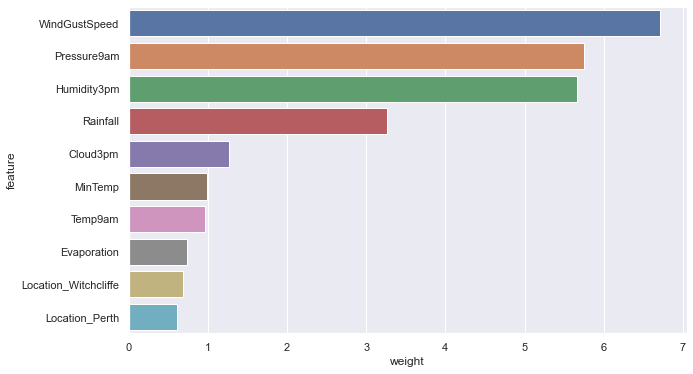

In [112]:
sns.barplot(data = weight_df.sort_values('weight', ascending = False).head(10), x = 'weight', y = 'feature')

WindGustSpeed is the most important factor to predict tomorrow raining

### Making Predictions and Evaluating the Model

In [103]:
#  Train model to make predictions and evaluate the model on train set, valuation set and test set.
# Create three variables 
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [113]:
# model.predict() : given a trained model, predict the label of a new set of data. This method accepts one argument, 
# the new data "X_train" , and returns the "learned label" for each object in the array.
train_preds = model.predict(X_train)

In [114]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [116]:
# actual target created from target column: "train_targets = train_df[target_col].copy()"
train_targets

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 97988, dtype: object

In [117]:
# "predict_proba()" gives the probabilities for the target (0 and 1) in array form. 
# The number of probabilities for each row is equal to the number of categories in target variable.
train_probs = model.predict_proba(X_train)
train_probs

array([[0.93950532, 0.06049468],
       [0.94332834, 0.05667166],
       [0.95980169, 0.04019831],
       ...,
       [0.98729776, 0.01270224],
       [0.98357829, 0.01642171],
       [0.87596766, 0.12403234]])

in first line, 94% confidence for NO (not raining tomorrow) and 6% confidence about YES (rain tomorrow).

In [119]:
model.classes_

array(['No', 'Yes'], dtype=object)

## Accuracy of model

In [121]:
# what percentage of matching values in train_preds and train_targets.
# Using the "accuracy_score" function from "sklearn.metrics".
from sklearn.metrics import accuracy_score

In [122]:
accuracy_score(train_targets, train_preds)

0.8519002326815528

85% accuracy on training set

"sklearn.metrics.confusion_matrix" Compute confusion matrix to evaluate the accuracy of a classification. Thus in binary classification, the count of true negatives is C0,0 , false negatives is C1,0 , true positives is C0,1 and false positives is C1,1.

In [123]:
from sklearn.metrics import confusion_matrix

In [124]:
confusion_matrix(train_targets, train_preds, normalize='true')

array([[0.94613466, 0.05386534],
       [0.477475  , 0.522525  ]])

TRUE NEGATIVEs (0.94613466);    FALSE POSITIVEs (0.05386534)

FALSE NAGATIVEs (0.477475);      TRUE POSITIVEs (0.522525)

In [125]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 85.19%


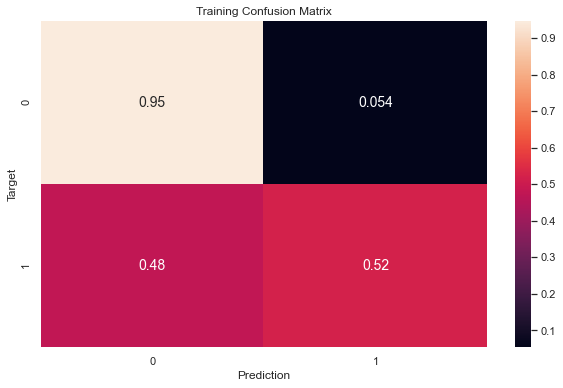

In [126]:
# model's accuracy on the train set (2007 to 2014)
train_preds = predict_and_plot(X_train, train_targets, 'Training')

Accuracy: 85.41%


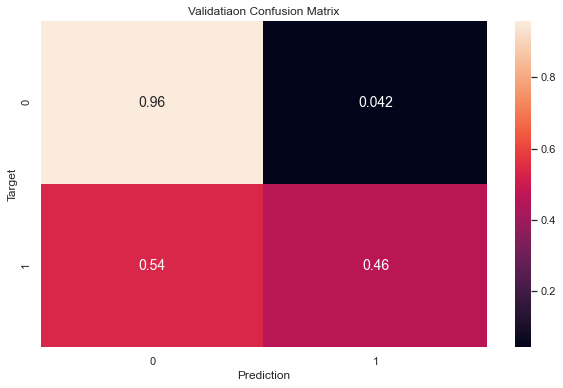

In [127]:
# model's accuracy on the validation set (2015)
val_preds = predict_and_plot(X_val, val_targets, 'Validatiaon')

Accuracy: 84.25%


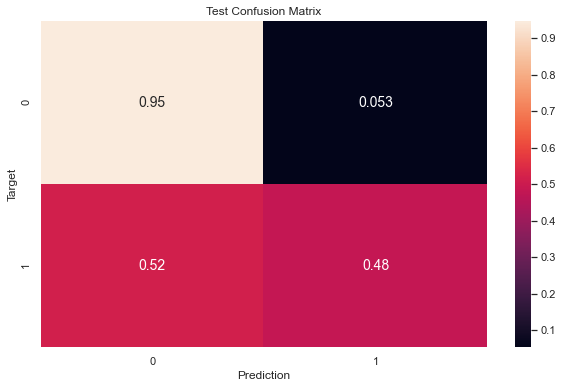

In [129]:
# model's accuracy on the test set (2016 and 2017)
test_preds = predict_and_plot(X_test, test_targets, 'Test')

Train set Accuracy: 85.19%; Validation set Accuracy: 85.41%; Test set Accuracy: 84.25%. are close together

For verifying whether a model has actually learned properly is to compare its results to a "random" or "dumb" model. Create two models as a bench mark: one that guesses randomly and another that always return "No". Both of these models completely ignore the inputs given to them.

In [130]:
# Definition of random model
def random_guess(inputs):
    return np.random.choice(["No", "Yes"], len(inputs))

In [131]:
accuracy_score(test_targets, random_guess(X_test))

0.49945546479968883

accuracy of saying "No" and "Yes" is 50%

In [134]:
# Definition of dump model
def all_no(inputs):
    return np.full(len(inputs), "No")

In [135]:
accuracy_score(test_targets, all_no(X_test))

0.7734344612991054

accuracy of saying "No" is 77%

Our model accuracy is higher of dump and random model and it is convincing.

### Predictions the new data.

Consider data collected from the Katherine weather department today. By using our model, we are going to predict tomorrow is raining or not.

In [136]:
new_input = {'Date': '2021-06-19',
             'Location': 'Katherine',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

Convert this new dictionary into a Pandas dataframe, similar to rain_data

In [139]:
# Create a new dataframe "new_input_df" and put the "new_input" into a list. All created rows in the list must have the same structure of our model.
new_input_df = pd.DataFrame([new_input])
new_input_df

Date   Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2021-06-19  Katherine     23.2     33.2      10.2          4.2       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0         NNW           52.0         NW        NNE          13.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          20.0         89.0         58.0       1004.8       1001.5       8.0   

   Cloud3pm  Temp9am  Temp3pm RainToday  
0       5.0     25.7     33.0       Yes

In [140]:
new_input_df[numeric_cols] = imputer.transform(new_input_df[numeric_cols])
new_input_df[numeric_cols] = scaler.transform(new_input_df[numeric_cols])
new_input_df[encoded_cols] = encoder.transform(new_input_df[categorical_cols])

In [141]:
new_input_df[numeric_cols]

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0  0.747642  0.718336  0.027493     0.028966  0.526244       0.356589   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0           0.1      0.229885         0.89         0.58     0.401653   

   Pressure3pm  Cloud9am  Cloud3pm   Temp9am  
0       0.3904  0.888889  0.555556  0.694093

In [142]:
X_new_input = new_input_df[numeric_cols + encoded_cols]
X_new_input

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0  0.747642  0.718336  0.027493     0.028966  0.526244       0.356589   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0           0.1      0.229885         0.89         0.58     0.401653   

   Pressure3pm  Cloud9am  Cloud3pm   Temp9am  Location_Adelaide  \
0       0.3904  0.888889  0.555556  0.694093                0.0   

   Location_Albany  Location_Albury  Location_AliceSprings  \
0              0.0              0.0                    0.0   

   Location_BadgerysCreek  Location_Ballarat  Location_Bendigo  \
0                     0.0                0.0               0.0   

   Location_Brisbane  Location_Cairns  Location_Canberra  Location_Cobar  \
0                0.0              0.0                0.0             0.0   

   Location_CoffsHarbour  Location_Dartmoor  Location_Darwin  \
0                    0.0                0.0              0.0   

   Location_GoldCoast  Location_Hobart  Location_Katherine  \
0                 0.0              0.0                 1.0   

   Location_Launceston  Location_Melbourne  Location_MelbourneAirport  \
0                  0.0                 0.0                        0.0   

   Location_Mildura  Location_Moree  Location_MountGambier  \
0               0.0             0.0                    0.0   

   Location_MountGinini  Location_Newcastle  Location_Nhil  \
0                   0.0                 0.0            0.0   

   Location_NorahHead  Location_NorfolkIsland  Location_Nuriootpa  \
0                 0.0                     0.0                 0.0   

   Location_PearceRAAF  Location_Penrith  Location_Perth  \
0                  0.0               0.0             0.0   

   Location_PerthAirport  Location_Portland  Location_Richmond  Location_Sale  \
0                    0.0                0.0                0.0            0.0   

   Location_SalmonGums  Location_Sydney  Location_SydneyAirport  \
0                  0.0              0.0                     0.0   

   Location_Townsville  Location_Tuggeranong  Location_Uluru  \
0                  0.0                   0.0             0.0   

   Location_WaggaWagga  Location_Walpole  Location_Watsonia  \
0                  0.0               0.0                0.0   

   Location_Williamtown  Location_Witchcliffe  Location_Wollongong  \
0                   0.0                   0.0                  0.0   

   Location_Woomera  WindGustDir_E  WindGustDir_ENE  WindGustDir_ESE  \
0               0.0            0.0              0.0              0.0   

   WindGustDir_N  WindGustDir_NE  WindGustDir_NNE  WindGustDir_NNW  \
0            0.0             0.0              0.0              1.0   

   WindGustDir_NW  WindGustDir_S  WindGustDir_SE  WindGustDir_SSE  \
0             0.0            0.0             0.0              0.0   

   WindGustDir_SSW  WindGustDir_SW  WindGustDir_W  WindGustDir_WNW  \
0              0.0             0.0            0.0              0.0   

   WindGustDir_WSW  WindGustDir_nan  WindDir9am_E  WindDir9am_ENE  \
0              0.0              0.0           0.0             0.0   

   WindDir9am_ESE  WindDir9am_N  WindDir9am_NE  WindDir9am_NNE  \
0             0.0           0.0            0.0             0.0   

   WindDir9am_NNW  WindDir9am_NW  WindDir9am_S  WindDir9am_SE  WindDir9am_SSE  \
0             0.0            1.0           0.0            0.0             0.0   

   WindDir9am_SSW  WindDir9am_SW  WindDir9am_W  WindDir9am_WNW  \
0             0.0            0.0           0.0             0.0   

   WindDir9am_WSW  WindDir9am_nan  WindDir3pm_E  WindDir3pm_ENE  \
0             0.0             0.0           0.0             0.0   

   WindDir3pm_ESE  WindDir3pm_N  WindDir3pm_NE  WindDir3pm_NNE  \
0             0.0           0.0            0.0             1.0   

   WindDir3pm_NNW  WindDir3pm_NW  WindDir3pm_S  WindDir3pm_SE  WindDir3pm_SSE  \
0             0.0            0.0           0.0            0.0             0.0

Make a prediction using "model.predict".

In [147]:
prediction = model.predict(X_new_input)[0]
prediction

'Yes'

The model predicts that it will rain tomorrow in Katherine! 

In [148]:
# Check the probability of the prediction.
prob = model.predict_proba(X_new_input)[0]
prob

array([0.48887147, 0.51112853])

51% probability of raining tomorrow; not too confident.

In [149]:
# Define a helper function to make predictions for individual inputs.
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, prob

In [150]:
new_input = {'Date': '2021-06-19',
             'Location': 'Launceston',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 12.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [151]:
predict_input(new_input)

('No', 0.8237794368566856)

82% confident that tomorrow is not raining

## Saving and Loading Trained Models

"joblib" module save and load Python objects on the disk.

In [154]:
import joblib

In [157]:
australia_rain = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

save above dictionary to a file using "joblib.dump"

In [158]:
joblib.dump(australia_rain, 'aussie_rain.joblib')

['aussie_rain.joblib']

In [159]:
#The object can be loaded back using "joblib.load"
australia_rain_prediction = joblib.load('aussie_rain.joblib')

In [162]:
australia_rain_prediction['model']

LogisticRegression(solver='liblinear')

 Use the loaded model to make predictions on the original test set.

In [163]:
test_preds_austalia = australia_rain_prediction['model'].predict(X_test)
accuracy_score(test_targets, test_preds_austalia)

0.8424737456242707

get the same result as the original model.